<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Ago18-19/Ago18_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mi código:

ymedia =  10.389629629629631
f(x) = 36.4164559025002 - 0.0133308857109593*x
m =  36.41645590250024
b =  -0.013330885710959259
Coeficiente de correlación r =  -0.9013055179502742
81.24% de los datos está descrito en el modelo lineal


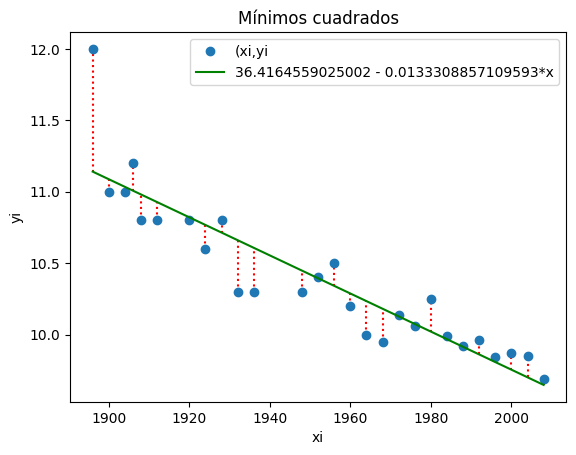

In [ ]:
import numpy as np
from numpy.linalg import inv
import sympy as sym
import matplotlib.pyplot as plt


data = np.loadtxt("olympic100m_men.txt", delimiter=',').T

xi = np.array(data[0])
yi = np.array(data[1])

xm = np.mean(xi)
ym = np.mean(yi)
n = len(xi)
sumx = np.sum(xi)
sumy = np.sum(yi)
sumxy = np.sum(xi*yi)
sumx2 = np.sum(xi**2)
sumy2 = np.sum(yi**2)

a1 = ((n*sumxy)-(sumx*sumy))/((n*sumx2)-sumx**2) #m
a0 = ym - (a1*xm)                                #b

#Creación del polinomio:
x = sym.Symbol('x')
f = a0 + a1*x

fx = sym.lambdify(x,f)
fi = fx(xi)

#Coeficiente de correlación:

numerador = (n*sumxy) - (sumx*sumy)
raiz1 = np.sqrt((n*sumx2)-(sumx**2))
raiz2 = np.sqrt((n*sumy2) - (sumy**2))
r = numerador / (raiz1 * raiz2)

#Coeficiente de determinación r**2

r2 = r**2
r2_porcentual = np.around(r2*100, 2)


print('ymedia = ',ym)
print('f(x) =', f)
print('m = ',a0)
print('b = ',a1)
print('Coeficiente de correlación r = ', r)
print(str(r2_porcentual)+'% de los datos está descrito en el modelo lineal')

for i in range(0,n,1):
  y0 = np.min([yi[i],fi[i]])
  y1 = np.max([yi[i],fi[i]])
  plt.vlines(xi[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(xi,yi,'o', label='(xi,yi')
#Promedio:
#plt.stem(xi,yi, bottom=ym)
plt.plot(xi,fi, color = 'green', label=f)
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()